In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [37]:
df.drop(columns='ocean_proximity',inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [38]:
df['median_house_value']=df['median_house_value']/100000
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,4.526
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3.585
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3.521
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3.413
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3.422
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0.781
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0.771
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0.923
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0.847


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20434 non-null  object 
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


In [40]:
df['total_bedrooms'] = pd.to_numeric(df['total_bedrooms'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [41]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [42]:
y=df[['median_house_value']]
X=df.drop(columns=y)


In [43]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,2.068558
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,1.153956
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.149990
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,1.196000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,1.797000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,2.647250
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,5.000010


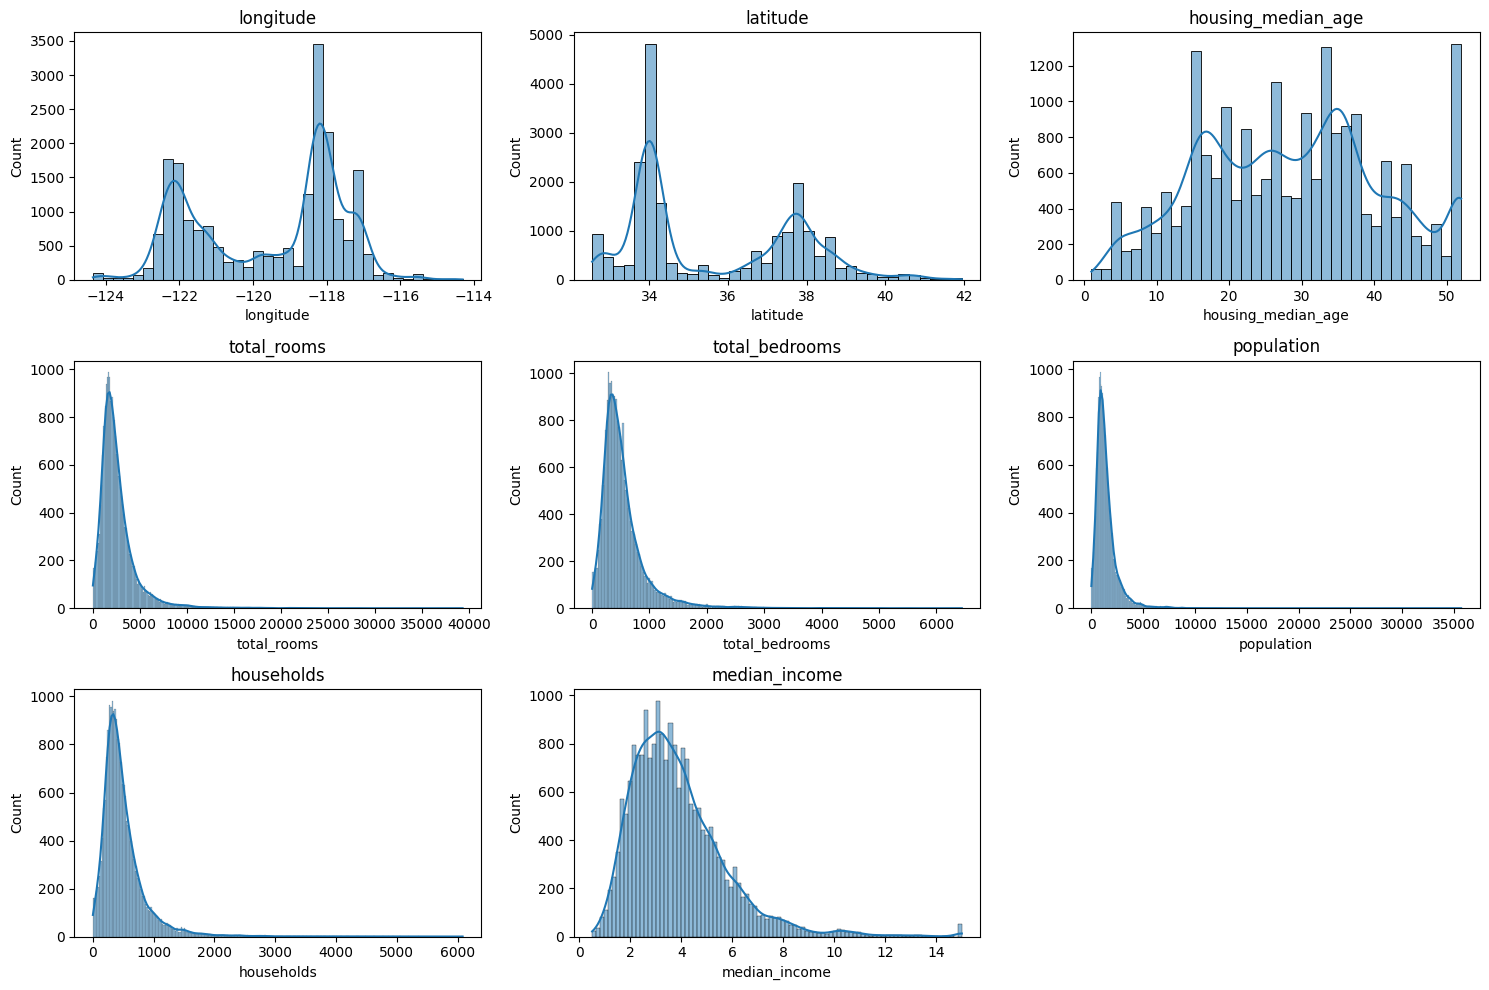

In [46]:
plt.figure(figsize=(15,10))
for i,col in enumerate(X.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde = True)
    plt.title(col)
plt.tight_layout()
plt.show()

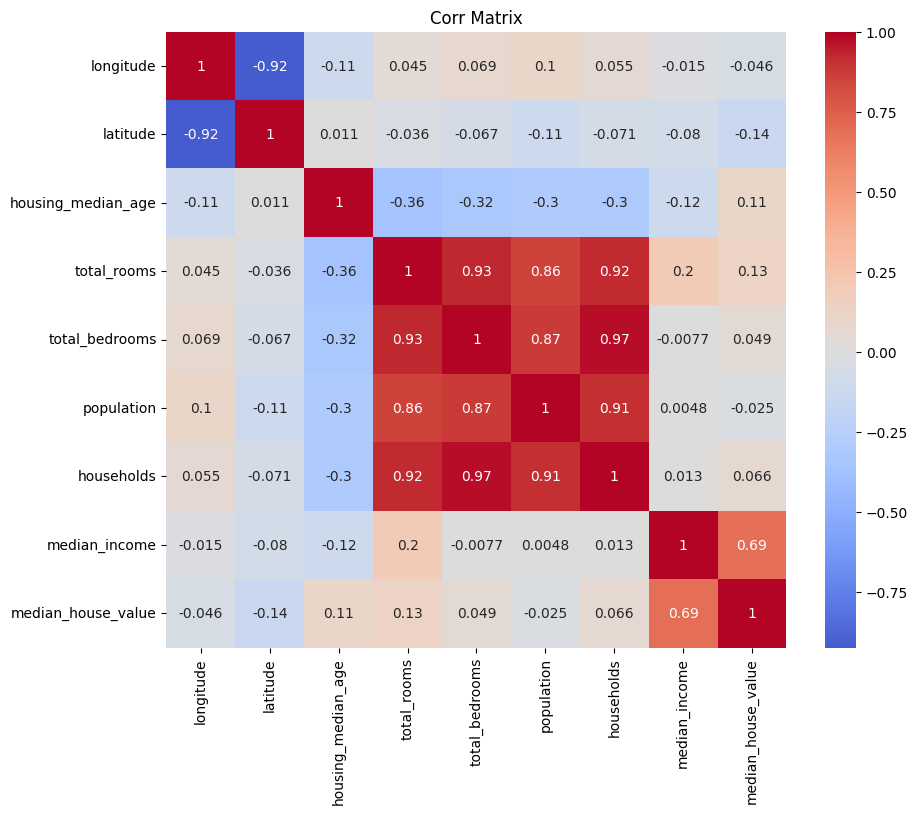

In [48]:
# corr
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',center=0)
plt.title('Corr Matrix')
plt.show()

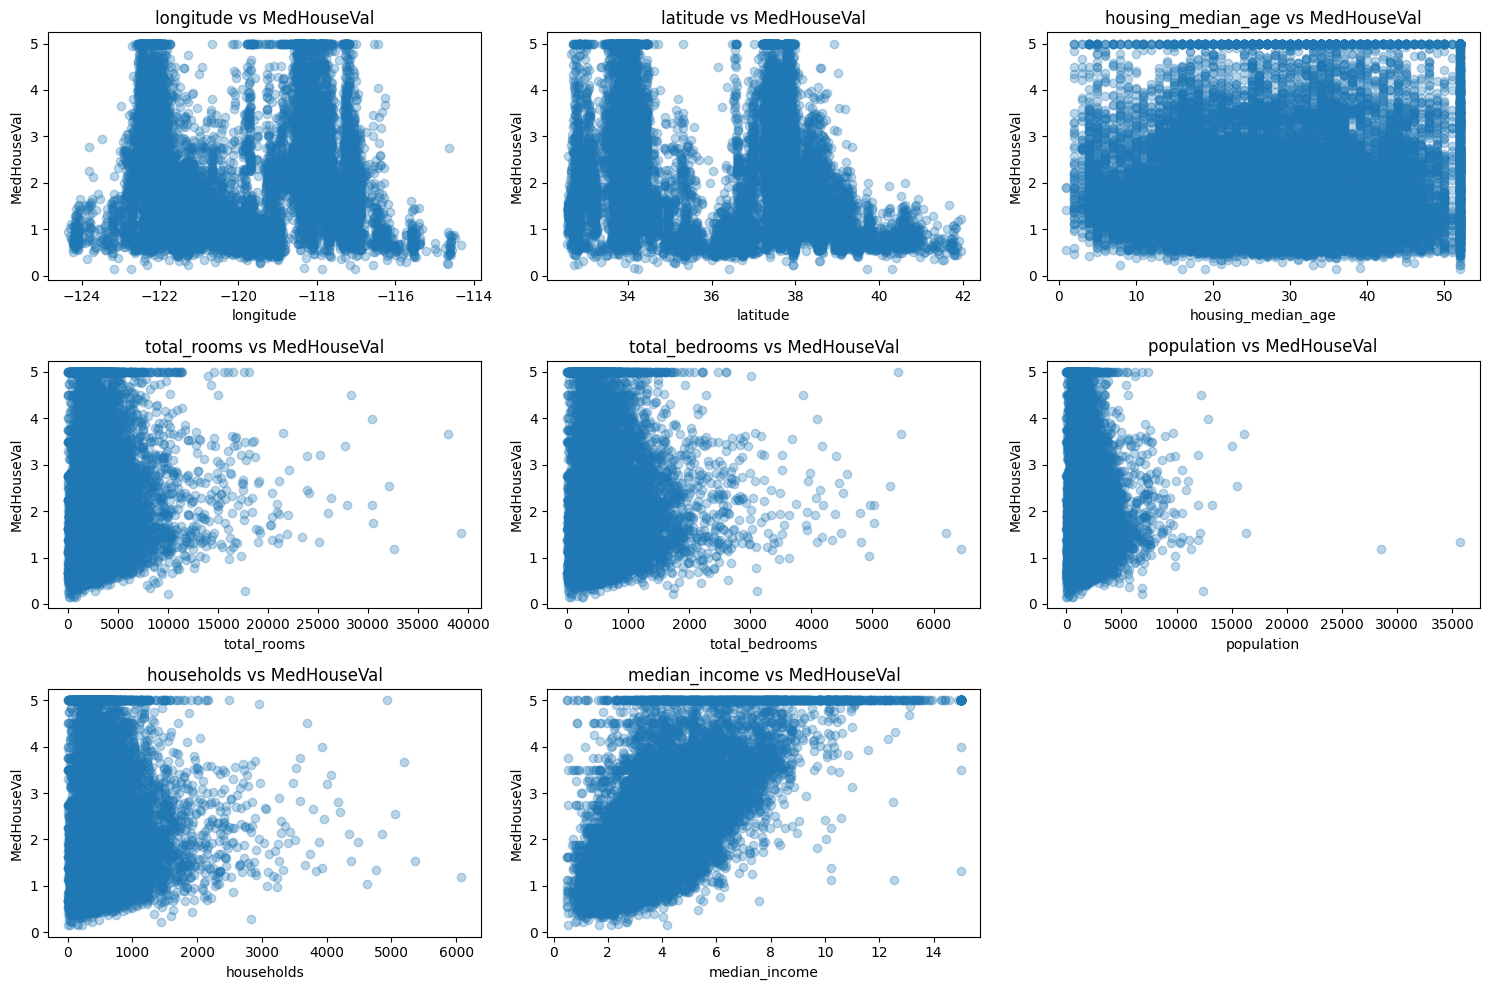

In [51]:
plt.figure(figsize=(15,10))
for i,col in enumerate(X.columns,1):
    plt.subplot(3,3,i)
    plt.scatter(df[col],df['median_house_value'],alpha=0.3)
    plt.xlabel(col)
    plt.ylabel('MedHouseVal')
    plt.title(f'{col} vs MedHouseVal')
plt.tight_layout()
plt.show()

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#  VIF - It tells how much a feature is copied by other features.
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,longitude,614.743604
1,latitude,549.104208
2,housing_median_age,7.281166
3,total_rooms,29.102874
4,total_bedrooms,71.902512
5,population,16.180822
6,households,74.381089
7,median_income,8.017521


In [53]:
# split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
# initialize model
model = LinearRegression()
model.fit(X_train_scaled,y_train)

# Make predictions on x_test data and compare it with y_test
y_pred  = model.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print("Model Performance : ")
print(f"rmse : {rmse:.2f}")
print(f"r2 : {r2:.2f}")



Model Performance : 
rmse : 0.71
r2 : 0.61


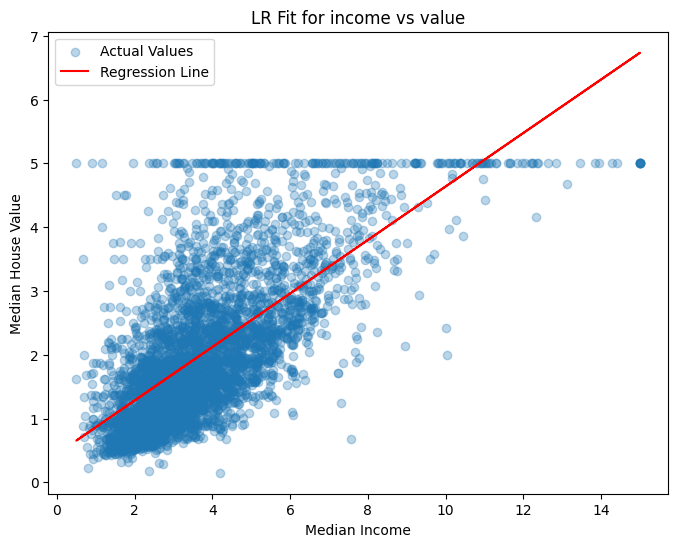

In [57]:
med_inc_test = X_test['median_income'].values
y_test_pred = model.predict(X_test_scaled)

# Get the values of the 'MedInc' column from X_test
# .values converts it from a pandas Series to a NumPy array
med_inc_test = X_test['median_income'].values


# Use the trained model to predict target values for the scaled test data
# X_test_scaled is the test data after scaling (standardization/normalization)
y_test_pred = model.predict(X_test_scaled)


# Create a new Linear Regression model
# This model will use only one feature (MedInc)
single_feature_model = LinearRegression()


# Train (fit) the new model using only the 'MedInc' column from training data
# X_train[['MedInc']] keeps it as a DataFrame (double brackets are important)
# y_train is the actual target values
single_feature_model.fit(X_train[['median_income']], y_train)


# Predict target values using only the 'MedInc' feature from test data
# This gives predictions from the single-feature model
y_pred_single = single_feature_model.predict(X_test[['median_income']])


plt.figure(figsize=(8,6))
plt.scatter(med_inc_test,y_test,alpha=0.3,label="Actual Values")
plt.plot(med_inc_test,y_pred_single,color='red',label='Regression Line')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('LR Fit for income vs value')
plt.legend()
plt.show()

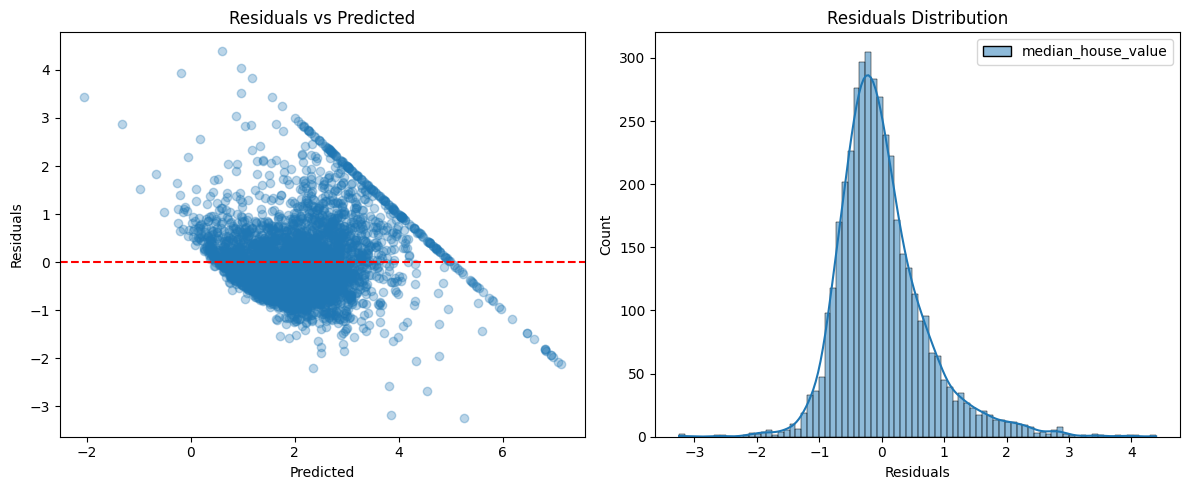

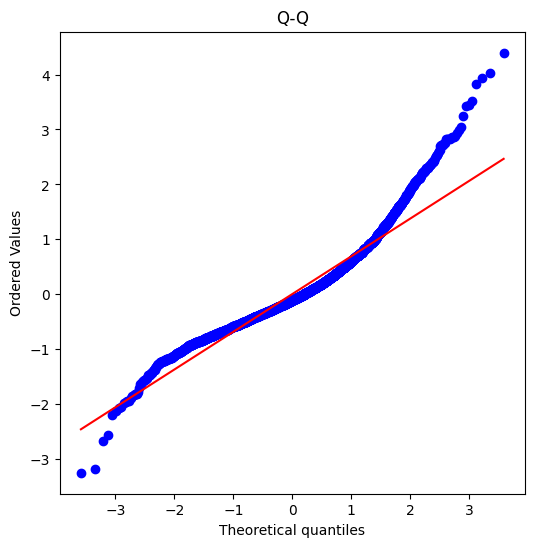

In [60]:
# calculate Residuals -- The difference between real value and predicted value.
residuals = y_test - y_pred

plt.figure(figsize=(12,5))

# Scatter
plt.subplot(1,2,1)
plt.scatter(y_pred,residuals,alpha=0.3)
plt.axhline(0,color='red',linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

# Histogram 
plt.subplot(1,2,2)
sns.histplot(residuals,kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()

# Q-Q plot
from scipy import stats
plt.figure(figsize=(6,6))
residuals_1d = np.asarray(residuals).ravel()
stats.probplot(residuals_1d,dist='norm',plot=plt)
plt.title('Q-Q')
plt.show()